# The Road to Relief: Identifying Key Drivers of Congestion on the I-94

### Purpose of the Project
>This portfolio project is designed to showcase exploratory data visualization techniques, utilising the `matplotlib` and `seaborn` Python libraries. 
>
>It is designed to build upon skills showcased in the `ebay_car_sales` project featured in this repository: specifically by introducing **data visualization methods** into the exploratory data analysis workflow.

### Project Background and Goal

The project focuses on initial analysis of a dataset containing roughly 48,000 records concerning westbound traffic on the [I-94 Interstate Highway](https://en.wikipedia.org/wiki/Interstate_94).

>**Our primary objective is to:**
>
>* Determine indicators of heavy traffic on the I-94. Such indicators may include: weather type, time of day, time of year *etc.*
>

### About the Dataset

The dataset was made public by John Hogue on May 6th 2019, available to download from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).

It consists of 48,204 hourly reported traffic volumes (along with weather and holiday features) for traffic moving *East-to-West*. The data was gathered by `MN DoT ATR station 301`, located roughly midway between Minneapolis and St Paul (Minnesota, USA) between the years 2012-2018. 

*Note*, the dataset does **not** contain records for dates between August 2014 - June 2015.

![Image](i94_figma.png)

**As such, we should be cautious not to generalize any findings from this analysis to the entire length of the I-94 Highway.**


The `data dictionary` below describes the meaning of each field in the dataset:

| Column name         | Description                                                               |
|---------------------|---------------------------------------------------------------------------|
| holiday             | US National holidays plus regional holiday, Minnesota State Fair          |
| temp                | Average temperature in units of Kelvin                                    |
| rain_1h             | Amount of rainfall in mm which occurred that hour                         |
| snow_1h             | Amount of snowfall in mm which occurred that hour                         |
| clouds_all          | Percentage of cloud cover                                                 |
| weather_main        | Short text description of weather conditions                              |
| weather_description | Full text description of weather conditions                               |
| date_time           | Date and hour the data was collected in local CST time                    |
| traffic_volume      | Hourly I-94 ATR 301 reported westbound traffic volume (vehicles per hour) |

## Preparing the Workbook: Importing Data Analysis Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # ignore warning messages

In [2]:
#%pip install seaborn 
import seaborn as sns
sns.set_theme()

## Reading the Data and Initial Cleaning

In [3]:
i94_traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

i94_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Looking over the head of the dataframe, we see the dataset consists of hourly reports of a number of features and the associated traffic volume in the immediate vicinity of `MN DoT ATR station 301` (as mentioned in the [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)).

Some column names can be made more descriptive. For instance, `rain_1h` and `snow_1h` can be changed to include the unit of measurement.

In [4]:
i94_traffic.rename(columns={"rain_1h": "rain_mm", "snow_1h": "snow_mm", "clouds_all": "cloud_cover_%"}, inplace=True)

The `temp` column lists the recorded temperautre in Kelvin. Since this is not a common unit in everyday life, we can convert to celsius and farenheit to give these numbers more meaning.

In [5]:
i94_traffic.rename(columns={"temp": "temp_K"}, inplace=True) # rename column to include unit

i94_traffic["temp_oC"] = (i94_traffic["temp_K"] - 273.15).round(2) # convert original temp column from kelvin to celsius and save as a new column

i94_traffic["temp_oF"] = ((i94_traffic["temp_oC"] * 1.8) + 32).round(2) # convert from celsius to fahrenheit and save as a new column

i94_traffic = i94_traffic.loc[:, ["holiday", "temp_K", "temp_oC", "temp_oF", "rain_mm", "snow_mm", "cloud_cover_%", "weather_main", "weather_description", "date_time", "traffic_volume"]] # reorder columns

In [6]:
i94_traffic.tail()

,holiday,temp_K,temp_oC,temp_oF,rain_mm,snow_mm,cloud_cover_%,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,10.30,50.54,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,9.61,49.30,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,9.58,49.24,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,8.94,48.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,8.97,48.15,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [7]:
i94_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp_K               48204 non-null  float64
 2   temp_oC              48204 non-null  float64
 3   temp_oF              48204 non-null  float64
 4   rain_mm              48204 non-null  float64
 5   snow_mm              48204 non-null  float64
 6   cloud_cover_%        48204 non-null  int64  
 7   weather_main         48204 non-null  object 
 8   weather_description  48204 non-null  object 
 9   date_time            48204 non-null  object 
 10  traffic_volume       48204 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 4.0+ MB


The `date_time` column should be converted to a datetime object as this is a better representation, allowing for time periods to be calculated if needed.

In [8]:
i94_traffic["date_time"] = pd.to_datetime(i94_traffic["date_time"], format="%Y-%m-%d %H:%M:%S")

We can also address the null values in the `holiday` column and fill these with *N/A*.

In [9]:
i94_traffic.loc[i94_traffic["holiday"].isnull(), "holiday"] = "N/A" # replace missing holiday values with "N/A"

i94_traffic[["holiday"]].value_counts()

holiday                  
N/A                          48143
Labor Day                        7
Martin Luther King Jr Day        6
Christmas Day                    6
New Years Day                    6
Thanksgiving Day                 6
Independence Day                 5
Columbus Day                     5
Memorial Day                     5
State Fair                       5
Veterans Day                     5
Washingtons Birthday             5
Name: count, dtype: int64

In [10]:
i94_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp_K               48204 non-null  float64       
 2   temp_oC              48204 non-null  float64       
 3   temp_oF              48204 non-null  float64       
 4   rain_mm              48204 non-null  float64       
 5   snow_mm              48204 non-null  float64       
 6   cloud_cover_%        48204 non-null  int64         
 7   weather_main         48204 non-null  object        
 8   weather_description  48204 non-null  object        
 9   date_time            48204 non-null  datetime64[ns]
 10  traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 4.0+ MB


In [11]:
i94_traffic.head()

,holiday,temp_K,temp_oC,temp_oF,rain_mm,snow_mm,cloud_cover_%,weather_main,weather_description,date_time,traffic_volume
0,N/A,288.28,15.13,59.23,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,N/A,289.36,16.21,61.18,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,N/A,289.58,16.43,61.57,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,N/A,290.13,16.98,62.56,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,N/A,291.14,17.99,64.38,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


A cursory glance suggests the dataset is in a state ready for analysis:

* Each field is represented by an appropriate datatype. 

* In addition, there are no null values in any of the fields.

* Anomalous datapoints can be identified during the initial exploratory data analysis process.

We can save the cleaner dataset to a csv at this stage, but we first next address instances of duplicated records.

In [12]:
i94_traffic.to_csv("i94_traffic_indicators_clean.csv", index=False) # save cleaned dataset

---

## Handling Duplicated Data

There are a number of instances of multiple rows for the same date and hour (see cells below). All fields are identical with the exception of weather descriptions. 

It is possible those responsible for data collection inputted multiple entries for the same hour either by mistake or if weather conditions changed slightly during the hour. Since these records are redundant, we can treat them as duplicates and keep only the first record for the day and hour.

In [13]:
i94_traffic[i94_traffic["date_time"] == "2013-04-18 22:00:00"]

,holiday,temp_K,temp_oC,temp_oF,rain_mm,snow_mm,cloud_cover_%,weather_main,weather_description,date_time,traffic_volume
5249,N/A,274.79,1.64,34.95,0.0,0.0,90,Mist,mist,2013-04-18 22:00:00,1532
5250,N/A,274.79,1.64,34.95,0.0,0.0,90,Drizzle,light intensity drizzle,2013-04-18 22:00:00,1532
5251,N/A,274.79,1.64,34.95,0.0,0.0,90,Rain,light rain,2013-04-18 22:00:00,1532
5252,N/A,274.79,1.64,34.95,0.0,0.0,90,Rain,moderate rain,2013-04-18 22:00:00,1532
5253,N/A,274.79,1.64,34.95,0.0,0.0,90,Snow,heavy snow,2013-04-18 22:00:00,1532
5254,N/A,274.79,1.64,34.95,0.0,0.0,90,Snow,snow,2013-04-18 22:00:00,1532


In [14]:
i94_traffic[i94_traffic["date_time"] == "2012-10-10 08:00:00"]

,holiday,temp_K,temp_oC,temp_oF,rain_mm,snow_mm,cloud_cover_%,weather_main,weather_description,date_time,traffic_volume
180,N/A,280.1,6.95,44.51,0.0,0.0,99,Rain,light rain,2012-10-10 08:00:00,6283
181,N/A,280.1,6.95,44.51,0.0,0.0,99,Drizzle,light intensity drizzle,2012-10-10 08:00:00,6283


#### Removing Duplicates:

In [15]:
date_time_frequencies = {}

for date_time in i94_traffic["date_time"]:
  
  if date_time in date_time_frequencies:
    date_time_frequencies[date_time] += 1
    
  else:
    date_time_frequencies[date_time] = 1

In [16]:
date_time_duplicates = []

for date_time in date_time_frequencies:
  
  if date_time_frequencies[date_time] > 1:
    date_time_duplicates.append(date_time)

We first create a frequency table for all date_time values in the dataset. Those which have a count greater than 1 have duplicate entries, so are appended to the list `date_time_duplicates`.

In [17]:
rows_to_drop = []

for duplicate in date_time_duplicates:
  
  rows_to_drop.append(i94_traffic.loc[i94_traffic["date_time"] == duplicate].index[1:]) # append all but the first instance of the duplicate to rows_to_drop
  
for row_index in rows_to_drop:
  
  i94_traffic = i94_traffic.drop(row_index)
  
i94_traffic = i94_traffic.reset_index(drop=True)

i94_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              40575 non-null  object        
 1   temp_K               40575 non-null  float64       
 2   temp_oC              40575 non-null  float64       
 3   temp_oF              40575 non-null  float64       
 4   rain_mm              40575 non-null  float64       
 5   snow_mm              40575 non-null  float64       
 6   cloud_cover_%        40575 non-null  int64         
 7   weather_main         40575 non-null  object        
 8   weather_description  40575 non-null  object        
 9   date_time            40575 non-null  datetime64[ns]
 10  traffic_volume       40575 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 3.4+ MB


A `rows_to_drop` list is then created. For each date_time value in the duplicate list, we append all but the first instance of the identified duplicates to the rows_to_drop list. We then drop all rows from the dataframe in this list. 

The list consists of the row_indexes to be dropped, so we then reset the index values after removing the duplicates so that there are no row index gaps in the cleaned dataframe.

The `.info()` method reveals we have removed 7,629 duplicate rows.

---

### Exploring the Temperature Column

In [18]:
i94_traffic[["temp_oC"]].describe()

,temp_oC
count,40575.000000
mean,8.166768
std,13.816620
min,-273.150000
25%,-1.310000
50%,9.710000
75%,19.130000
max,36.920000


In [19]:
i94_traffic[["temp_oC"]].value_counts().sort_index(ascending=False)

temp_oC
 36.92      1
 36.14      1
 35.93      1
 35.80      1
 35.72      1
           ..
-28.33      3
-28.93      1
-29.53      1
-29.76      1
-273.15    10
Name: count, Length: 5443, dtype: int64

There are 10 inaccurate values (-273.15 oC). This corresponds to 0K (absolute zero) which is clearly impossible.

In [20]:
i94_traffic[i94_traffic["temp_oC"] == -273.15][["temp_oC"]]

,temp_oC
10079,-273.15
10080,-273.15
10081,-273.15
10082,-273.15
10127,-273.15
10128,-273.15
10129,-273.15
10130,-273.15
10131,-273.15
10132,-273.15


The records with these values were recorded on consecutively on two days very near to one another (indicated by the proximity of the index numbers). This would suggest there were a couple of days where the temperature measurement system was inactive/faulty, recording a temp value of 0.0.

In [21]:
i94_traffic.loc[10076:10085, ["date_time","temp_K"]]

,date_time,temp_K
10076,2014-01-31 00:00:00,255.93
10077,2014-01-31 01:00:00,255.93
10078,2014-01-31 02:00:00,255.93
10079,2014-01-31 03:00:00,0.00
10080,2014-01-31 04:00:00,0.00
10081,2014-01-31 05:00:00,0.00
10082,2014-01-31 06:00:00,0.00
10083,2014-01-31 07:00:00,255.93
10084,2014-01-31 08:00:00,255.93
10085,2014-01-31 09:00:00,255.93


Temperature is recorded hourly, so we can fill these inaccurate values with the temperature reading in closest proximity to the missing values. 

Since 255.93 appears a number of times before and after the inaccurate values, we can fill with this value. This is obviously an estimate as it is practically impossible for the temperature to remain exactly the same over a nine hour period.

In [22]:
i94_traffic.loc[10079:10082,"temp_K"] = 255.93

Verifying the values have been filled:

In [23]:
i94_traffic.loc[10076:10085, ["date_time","temp_K"]]

,date_time,temp_K
10076,2014-01-31 00:00:00,255.93
10077,2014-01-31 01:00:00,255.93
10078,2014-01-31 02:00:00,255.93
10079,2014-01-31 03:00:00,255.93
10080,2014-01-31 04:00:00,255.93
10081,2014-01-31 05:00:00,255.93
10082,2014-01-31 06:00:00,255.93
10083,2014-01-31 07:00:00,255.93
10084,2014-01-31 08:00:00,255.93
10085,2014-01-31 09:00:00,255.93


We repeat for the other six zero values:

In [24]:
i94_traffic.loc[10123:10136, ["date_time","temp_K"]]

,date_time,temp_K
10123,2014-02-01 23:00:00,256.51
10124,2014-02-02 00:00:00,255.59
10125,2014-02-02 01:00:00,255.48
10126,2014-02-02 02:00:00,255.37
10127,2014-02-02 03:00:00,0.00
10128,2014-02-02 04:00:00,0.00
10129,2014-02-02 05:00:00,0.00
10130,2014-02-02 06:00:00,0.00
10131,2014-02-02 07:00:00,0.00
10132,2014-02-02 08:00:00,0.00


For the remaining six zeros to be filled, we can replace the three zero values closer to the 2am measurement with the average of the 1am-2am temperature readings. The same can be applied to the zero values closer to the 9am temperature reading, except they are to be filled with the average of the 9am-10am readings.

Again, this is not a perfect solution, but serves to provide a realistic estimate for the unknowns.

In [25]:
fill_value_10127_10129 = i94_traffic.loc[10124:10126, "temp_K"].mean().round(2)

fill_value_10130_10132 = i94_traffic.loc[10133:10135, "temp_K"].mean().round(2)

i94_traffic.loc[10127:10129, "temp_K"] = fill_value_10127_10129

i94_traffic.loc[10130:10132,"temp_K"] = fill_value_10130_10132

Verifying the values have been filled:

In [26]:
i94_traffic.loc[10123:10136, ["date_time","temp_K"]]

,date_time,temp_K
10123,2014-02-01 23:00:00,256.51
10124,2014-02-02 00:00:00,255.59
10125,2014-02-02 01:00:00,255.48
10126,2014-02-02 02:00:00,255.37
10127,2014-02-02 03:00:00,255.48
10128,2014-02-02 04:00:00,255.48
10129,2014-02-02 05:00:00,255.48
10130,2014-02-02 06:00:00,256.94
10131,2014-02-02 07:00:00,256.94
10132,2014-02-02 08:00:00,256.94


We then pass the updated `temp_K` values to the other temperature columns:

In [27]:
i94_traffic["temp_oC"] = (i94_traffic["temp_K"] - 273.15).round(2) 

i94_traffic["temp_oF"] = ((i94_traffic["temp_oC"] * 1.8) + 32).round(2)

Verifying:

In [28]:
i94_traffic.loc[10076:10085, ["date_time","temp_K", "temp_oC", "temp_oF"]]

,date_time,temp_K,temp_oC,temp_oF
10076,2014-01-31 00:00:00,255.93,-17.22,1.0
10077,2014-01-31 01:00:00,255.93,-17.22,1.0
10078,2014-01-31 02:00:00,255.93,-17.22,1.0
10079,2014-01-31 03:00:00,255.93,-17.22,1.0
10080,2014-01-31 04:00:00,255.93,-17.22,1.0
10081,2014-01-31 05:00:00,255.93,-17.22,1.0
10082,2014-01-31 06:00:00,255.93,-17.22,1.0
10083,2014-01-31 07:00:00,255.93,-17.22,1.0
10084,2014-01-31 08:00:00,255.93,-17.22,1.0
10085,2014-01-31 09:00:00,255.93,-17.22,1.0


In [29]:
i94_traffic.loc[10123:10136, ["date_time","temp_K", "temp_oC", "temp_oF"]]

,date_time,temp_K,temp_oC,temp_oF
10123,2014-02-01 23:00:00,256.51,-16.64,2.05
10124,2014-02-02 00:00:00,255.59,-17.56,0.39
10125,2014-02-02 01:00:00,255.48,-17.67,0.19
10126,2014-02-02 02:00:00,255.37,-17.78,-0.00
10127,2014-02-02 03:00:00,255.48,-17.67,0.19
10128,2014-02-02 04:00:00,255.48,-17.67,0.19
10129,2014-02-02 05:00:00,255.48,-17.67,0.19
10130,2014-02-02 06:00:00,256.94,-16.21,2.82
10131,2014-02-02 07:00:00,256.94,-16.21,2.82
10132,2014-02-02 08:00:00,256.94,-16.21,2.82


This confirms the zero values have been filled across all three fields.

We can overwrite our previous cleaned csv file since we have performed further cleaning duties (by removing duplicate records and filling bad temperature values).

In [30]:
i94_traffic.to_csv("i94_traffic_indicators_clean.csv", index=False)

---

### Visualizing the Clean Temperature Data

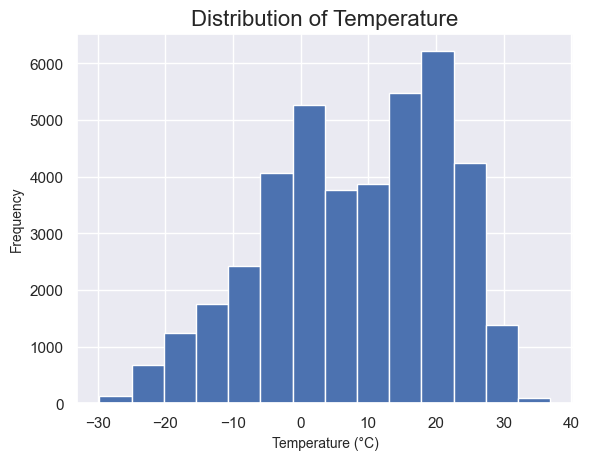

In [31]:
i94_traffic["temp_oC"].plot.hist(bins=14)
plt.title("Distribution of Temperature", fontsize=16)
plt.grid(visible=True, which="both", axis="both")
plt.xlabel("Temperature (°C)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.show()

In [32]:
i94_traffic["temp_oC"].value_counts(bins=14).sort_index(ascending=False)

(32.157, 36.92]                     99
(27.394, 32.157]                  1375
(22.631, 27.394]                  4235
(17.869, 22.631]                  6212
(13.106, 17.869]                  5470
(8.343, 13.106]                   3871
(3.58, 8.343]                     3765
(-1.183, 3.58]                    5265
(-5.946, -1.183]                  4070
(-10.709, -5.946]                 2426
(-15.471, -10.709]                1748
(-20.234, -15.471]                1242
(-24.997, -20.234]                 672
(-29.828000000000003, -24.997]     125
Name: count, dtype: int64

We observe an approximate normal distribution of temperature values. The distribution also appears to show bimodality, with the highest frequency of recorded temperatures falling either within the ranges:

* -1.2 to 3.6  Celsius
* 17.9 to 22.6 Celsius

In [33]:
i94_traffic[["temp_oC"]].describe()

,temp_oC
count,40575.000000
mean,8.229885
std,13.097593
min,-29.760000
25%,-1.310000
50%,9.710000
75%,19.130000
max,36.920000


## Analysis of Traffic Volume

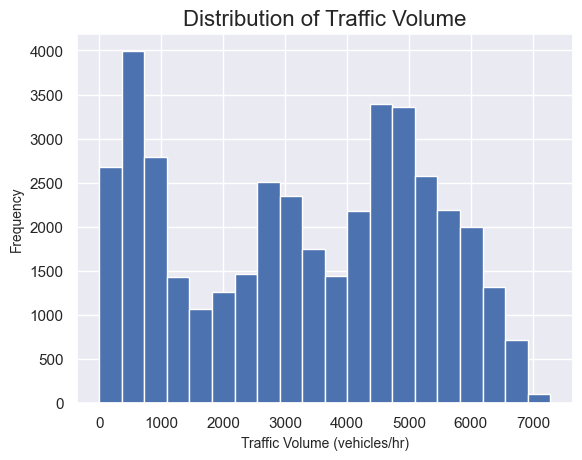

In [34]:
i94_traffic["traffic_volume"].plot.hist(bins=20)
plt.title("Distribution of Traffic Volume", fontsize=16)
plt.xlabel("Traffic Volume (vehicles/hr)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.show()

In [35]:
i94_traffic["traffic_volume"].value_counts(bins=20).sort_index(ascending=False)

(6916.0, 7280.0]                104
(6552.0, 6916.0]                719
(6188.0, 6552.0]               1314
(5824.0, 6188.0]               1999
(5460.0, 5824.0]               2187
(5096.0, 5460.0]               2575
(4732.0, 5096.0]               3359
(4368.0, 4732.0]               3397
(4004.0, 4368.0]               2180
(3640.0, 4004.0]               1448
(3276.0, 3640.0]               1744
(2912.0, 3276.0]               2347
(2548.0, 2912.0]               2513
(2184.0, 2548.0]               1467
(1820.0, 2184.0]               1264
(1456.0, 1820.0]               1067
(1092.0, 1456.0]               1425
(728.0, 1092.0]                2793
(364.0, 728.0]                 3965
(-7.281000000000001, 364.0]    2708
Name: count, dtype: int64

The distribution of traffic volume does not show a normal or uniform distribution. We can see some resemblance to multimodal distributions due to the appearance of a number of more frequent traffic volumes across the dataset.

The distribution also shows some slight positive skew (due to the appearance of a tail tending towards the positive x axis). 

This is corroborated by the median exceeding the value of the mean:

In [36]:
i94_traffic[["traffic_volume"]].describe()

,traffic_volume
count,40575.000000
mean,3290.650474
std,1984.772909
min,0.000000
25%,1248.500000
50%,3427.000000
75%,4952.000000
max,7280.000000


Over the entirety of the data collection period, the hourly westbound traffic volume varied between 0 and 7,280 vehicles per hour, with a mean of 3,291. 

From the quartiles, we can deduce:

* Around 25% of the time, only 1,248 vehicles or fewer passed the station each hour - *we can presume these are likely to be night-time hours (or if the road is under construction/heavy congestion)*. 

* Around 50% of the time, between 1,248 and 4,952 vehicles passed the station each hour. 

* Around 25% of the time, the traffic volume is roughly 4x greater than the lower quartile with 4,952 vehicles or greater passing the station each hour. 

Comparing traffic volumes between day-time and night-time hours could be an interesting avenue to explore.

## Day-time vs. Night-time Traffic Volume

We can begin by dividing the dataset into two parts according to the following critera:

* Daytime data: hour of collection 6AM - 6PM (exclusive)

* Nighttime data: hour of collection 6PM - 6AM (exclusive)

In [37]:
daytime = i94_traffic[(i94_traffic["date_time"].dt.hour >= 6) & (i94_traffic["date_time"].dt.hour < 18)]

nighttime = i94_traffic[(i94_traffic["date_time"].dt.hour < 6) | (i94_traffic["date_time"].dt.hour >= 18)]

In [38]:
daytime.shape

(20151, 11)

In [39]:
nighttime.shape

(20424, 11)

The sizes of the `daytime` and `nighttime` datasets are not quite the same because there are some missing hours for a number of days across the entire dataset. 

For instance, there is no data for 6pm to 10pm on the 30th June 2015:

In [40]:
i94_traffic.iloc[14044:14046]

,holiday,temp_K,temp_oC,temp_oF,rain_mm,snow_mm,cloud_cover_%,weather_main,weather_description,date_time,traffic_volume
14044,N/A,296.75,23.6,74.48,0.0,0.0,1,Clear,sky is clear,2015-06-30 17:00:00,6109
14045,N/A,291.35,18.2,64.76,0.0,0.0,1,Clear,sky is clear,2015-06-30 22:00:00,2020


### Visualizing the Daytime and Nighttime Traffic Volume Distributions

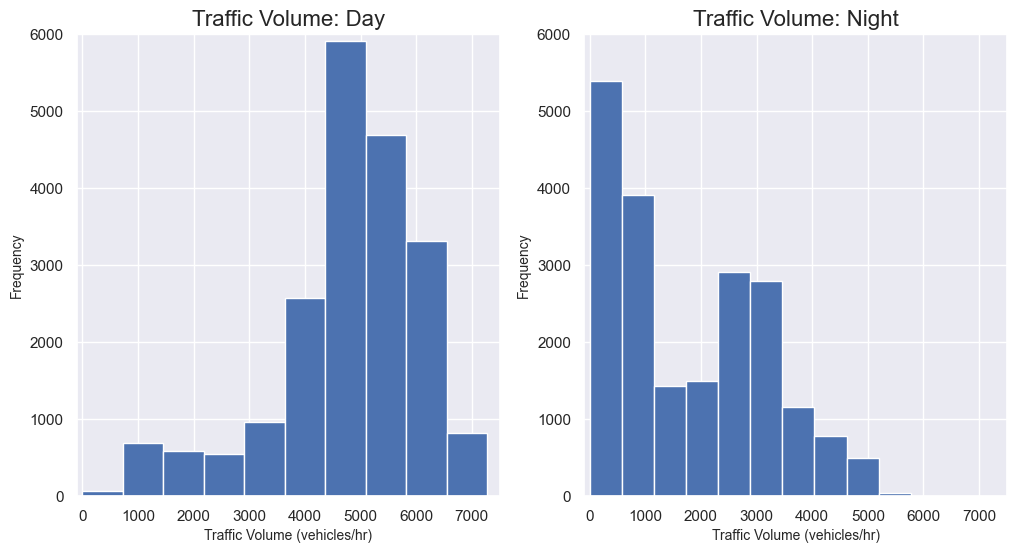

In [41]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
daytime["traffic_volume"].plot.hist(bins=10)
plt.title("Traffic Volume: Day", fontsize=16)
plt.xlabel("Traffic Volume (vehicles/hr)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xlim(-100, 7500)
plt.ylim(0, 6000)

plt.subplot(1,2,2)
nighttime["traffic_volume"].plot.hist(bins=10)
plt.title("Traffic Volume: Night", fontsize=16)
plt.xlabel("Traffic Volume (vehicles/hr)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xlim(-100, 7500)
plt.ylim(0, 6000)

plt.show()

In [42]:
daytime["traffic_volume"].value_counts(bins=10).sort_index(ascending=False)

(6552.1, 7280.0]     823
(5824.2, 6552.1]    3313
(5096.3, 5824.2]    4687
(4368.4, 5096.3]    5910
(3640.5, 4368.4]    2577
(2912.6, 3640.5]     960
(2184.7, 2912.6]     544
(1456.8, 2184.7]     582
(728.9, 1456.8]      688
(-6.28, 728.9]        67
Name: count, dtype: int64

In [43]:
nighttime["traffic_volume"].value_counts(bins=10).sort_index(ascending=False)

(5195.7, 5773.0]      45
(4618.4, 5195.7]     498
(4041.1, 4618.4]     779
(3463.8, 4041.1]    1159
(2886.5, 3463.8]    2790
(2309.2, 2886.5]    2915
(1731.9, 2309.2]    1499
(1154.6, 1731.9]    1437
(577.3, 1154.6]     3912
(-5.774, 577.3]     5390
Name: count, dtype: int64

In [44]:
daytime[["traffic_volume"]].describe()

,traffic_volume
count,20151.000000
mean,4784.140440
std,1294.135919
min,1.000000
25%,4310.000000
50%,4943.000000
75%,5678.000000
max,7280.000000


#### Daytime Remarks

The daytime traffic volume distribution is negatively skewed (left skewed). 

The majority of traffic volumes recorded during 6AM - 6PM are greater than the average for the combined dataset. 

>75% of the time, there are **at least** `4,310 vehicles` passing the traffic station per hour.

In [45]:
nighttime[["traffic_volume"]].describe()

,traffic_volume
count,20424.000000
mean,1817.123433
std,1342.232306
min,0.000000
25%,542.000000
50%,1484.500000
75%,2912.000000
max,5773.000000


#### Nighttime Remarks

In contrast, the nightime histogram illustrates a positive skew (right skew). 

This means the majority of the traffic volumes during 6PM - 6AM are lower than the average for the combined dataset.

>75% of the time, there are **fewer than** `2,912 vehicles` passing the station per hour. 

Though there are some occurrences of high traffic volumes during nighttime hours, generally, traffic volume is light.

---

Since we are primarily concerned with identifying indicators of high traffic volume, we can focus on the daytime data moving forward.

## Indicator I: Time

One possible indicator for high traffic volume is time. We can reasonably expect more people to be on the road depending on the: 

* Time of month 

* Day of the Week

* Time of day

* Whether the day is a holiday or not

### Visualizing Traffic Volume By Month

We can easily aggregate traffic volume by month using the `.groupby()` pandas method. 

First, we extract the month from the date_time column of the `daytime` dataframe and assign this as a new column. We then aggregate traffic volume using this column, finding the average traffic volume for each month.

In [46]:
pd.options.mode.chained_assignment = None # turn off "SettingWithCopyWarning"

daytime['month'] = daytime.loc[:,'date_time'].dt.month

daytime_by_month = daytime.groupby('month').mean(numeric_only=True)

daytime_by_month[['traffic_volume']]

,traffic_volume
month,
1,4489.151627
2,4750.065927
3,4920.966972
4,4959.083776
5,4914.889571
6,4921.709215
7,4606.614988
8,4949.894652
9,4853.930468


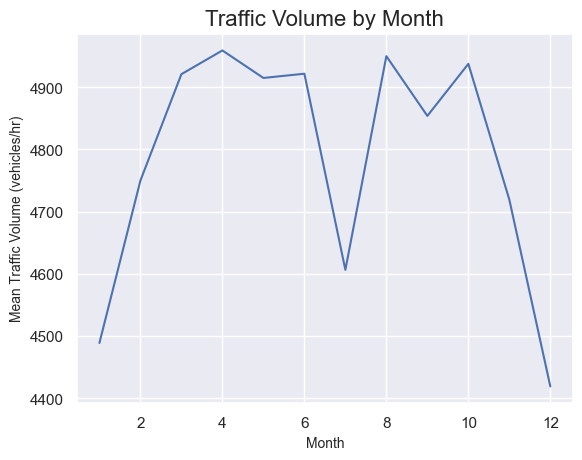

In [47]:
daytime_by_month['traffic_volume'].plot.line()
plt.title("Traffic Volume by Month", fontsize=16)
plt.xlabel("Month", fontsize=10)
plt.ylabel("Mean Traffic Volume (vehicles/hr)", fontsize=10)

plt.show()

Generally, we see traffic volume is at its greatest during the warmer months (March-October) and less intense during the winter months (November-February).

July is an interesting exception. We can ask ourselves, is traffic significantly less heavy in July every year?

To answer this question, we can compare how traffic volume in July changes year-on-year:

In [48]:
daytime["year"] = daytime.loc[:,'date_time'].dt.year

only_july = daytime[daytime['month'] == 7]

only_july = only_july.groupby('year').mean(numeric_only=True)

only_july[["traffic_volume"]]

,traffic_volume
year,
2013,4928.203438
2014,4910.846154
2015,4583.593496
2016,4015.122951
2017,4645.809264
2018,4615.868280


Above, we have created a dataframe for the July months, aggregated by year. 

We will make use of this approach below with other summer months to render a grid visualization of year-to-year change in traffic volume for June, July and August. This will allow us to identify if there is deeper meaning to the lower July traffic volume we visualized above, or if it is a result of an outlier.

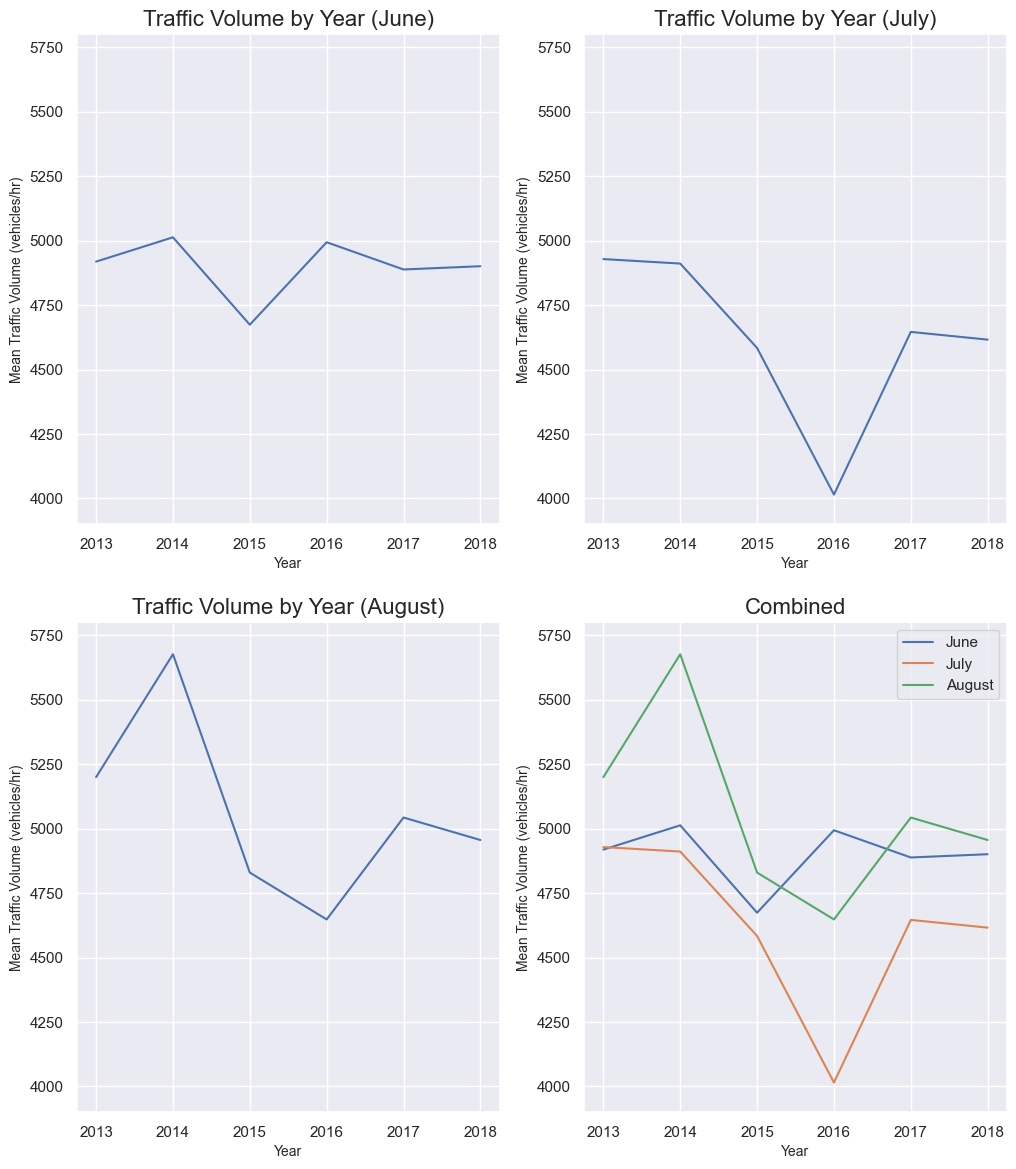

In [49]:
summer_months = [6, 7, 8]
summer_month_names = ["June", "July", "August"]

plt.figure(figsize=(12,14))

monthly_data = {}

for month_num, month, index in zip(summer_months, summer_month_names, range(1,4)): # creates combined iterable [(6, "June", 1), (7, "July", 2), (8, "August", 3)]
  
    only_month = daytime[daytime['month'] == month_num]
    only_month['year'] = only_month.loc[:,'date_time'].dt.year
    only_month = only_month.groupby('year').mean(numeric_only=True) # generates aggregated data for each summer month (as in the above cell)
    
    monthly_data[month] = only_month # saves aggregated data for each month in a dictionary
    
    plt.subplot(2,2,index) # plots data series for each summer month separately in 3 positions of a 2x2 grid. the index variable is used to determine the subplot number
    
    monthly_data[month]["traffic_volume"].plot.line()
    plt.title(f"Traffic Volume by Year ({month})", fontsize=16)
    plt.xlabel("Year", fontsize=10)
    plt.ylabel("Mean Traffic Volume (vehicles/hr)", fontsize=10)
    plt.ylim(3900, 5800)
    
plt.subplot(2,2,4) # plots all data series for each summer month together on a combined plot in the remaining position of the 2x2 grid
    
for month, data in monthly_data.items():
    
    plt.plot(data.index, data["traffic_volume"], label=month) # data.index is the year (the index of the aggregated data)
    
plt.title("Combined", fontsize=16)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Mean Traffic Volume (vehicles/hr)", fontsize=10)
plt.ylim(3900, 5800)
    
plt.legend()
plt.show()

We see July typically has a high mean traffic volume year-to-year, in line with other summer months (which cluster around 5,000 vehicles per hour). One notable exception is 2016 - the mean traffic volume sharply drops to `4,015 vehicles per hour`, falling out of line with the trend.

One possible reason for this sharp drop is road construction, leading to a lower traffic volume than otherwise expected. An [article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

This means the July drop-off we identified in the monthly traffic volume is likely a result of outside factors (roadworks) influencing the data during the collection period. 

>**We can reasonably conclude that the July traffic volume is typically no different to any other summer month.**

### Visualizaing Traffic Volume by Day

This is a more granular indicator and will allow us to identify trends in traffic volume over a typical week.

In [50]:
daytime["weekday"] = daytime.loc[:,'date_time'].dt.dayofweek

daytime_averages_by_weekday = daytime.groupby('weekday').mean(numeric_only=True)

for row in daytime_averages_by_weekday:
  
  daytime_averages_by_weekday["weekday"] = daytime_averages_by_weekday.index.map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

daytime_averages_by_weekday.index.rename("index", inplace=True)

daytime_averages_by_weekday = daytime_averages_by_weekday[["weekday", "traffic_volume"]]

daytime_averages_by_weekday

,weekday,traffic_volume
index,,
0,Monday,5009.683258
1,Tuesday,5308.633663
2,Wednesday,5402.851890
3,Thursday,5403.389294
4,Friday,5349.250172
5,Saturday,3762.996171
6,Sunday,3265.174647


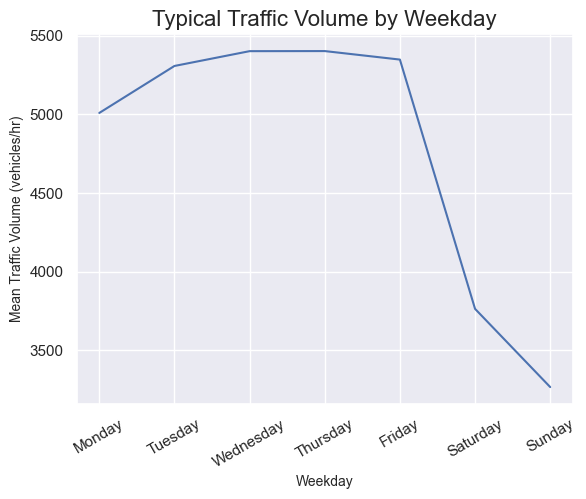

In [51]:
plt.plot(daytime_averages_by_weekday["weekday"], daytime_averages_by_weekday["traffic_volume"])
plt.title("Typical Traffic Volume by Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=10)
plt.xticks(rotation=30)
plt.ylabel("Mean Traffic Volume (vehicles/hr)", fontsize=10)

plt.show()

#### Remarks

>* Traffic volume is significantly heavier during business days (Mon-Fri).  Monday appears to have a slightly lighter volume than the other four business days, though all traffic volumes are in excess of 5,000 vehicles per hour.
>
>* On weekends, the mean traffic volume is notably lighter, with values less than 3,800 vehicles per hour.

### Visualizing Traffic Volume by Hour

We can look through an even more granular lens and examine how traffic volume changes by the hour of the day. 

Before doing this, we should separate business days from weekends since they should be treated as two distinct categories.

In [52]:
daytime["hour"] = daytime.loc[:,"date_time"].dt.hour

daytime_business_days = daytime[daytime['weekday'].between(0,4)]

daytime_weekends = daytime[daytime['weekday'].between(5,6)]

In [53]:
daytime_business_days_averages_by_hour = daytime_business_days.groupby('hour').mean(numeric_only=True)

daytime_business_days_averages_by_hour[["traffic_volume"]]

,traffic_volume
hour,
6,5375.273780
7,6061.162458
8,5508.896580
9,4900.601709
10,4400.511513
11,4663.444724
12,4873.933775
13,4879.508446
14,5182.139324


In [54]:
daytime_weekends_averages_by_hour = daytime_weekends.groupby('hour').mean(numeric_only=True)

daytime_weekends_averages_by_hour[["traffic_volume"]]

,traffic_volume
hour,
6,1103.097046
7,1600.200413
8,2353.924490
9,3132.916844
10,3718.390593
11,4081.983087
12,4402.638430
13,4407.611452
14,4392.836777


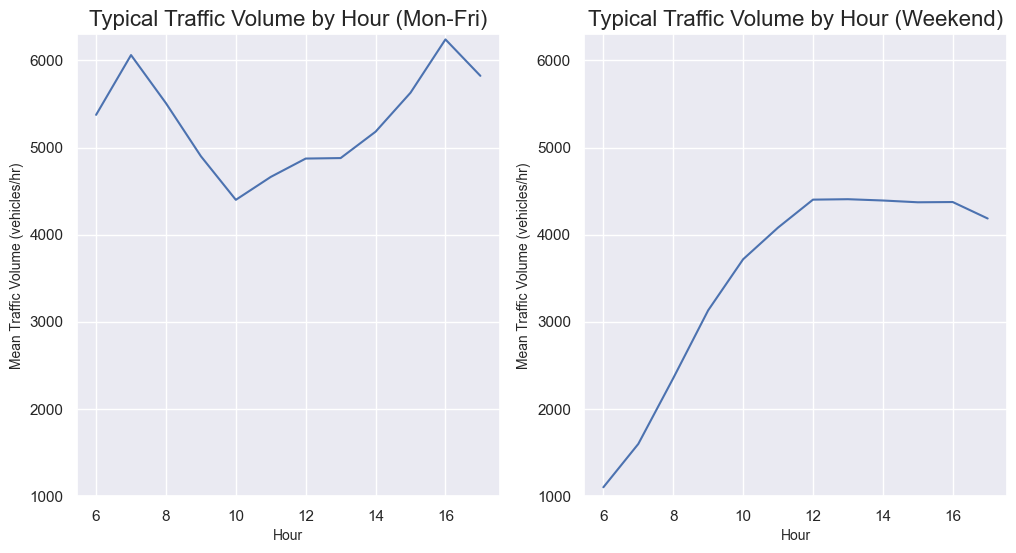

In [55]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

daytime_business_days_averages_by_hour["traffic_volume"].plot.line()
plt.title("Typical Traffic Volume by Hour (Mon-Fri)", fontsize=16)
plt.xlabel("Hour", fontsize=10)
plt.ylabel("Mean Traffic Volume (vehicles/hr)", fontsize=10)
plt.ylim(1000, 6300)

plt.subplot(1,2,2)

daytime_weekends_averages_by_hour["traffic_volume"].plot.line()
plt.title("Typical Traffic Volume by Hour (Weekend)", fontsize=16)
plt.xlabel("Hour", fontsize=10)
plt.ylabel("Mean Traffic Volume (vehicles/hr)", fontsize=10)
plt.ylim(1000, 6300)

plt.show()

#### Remarks

>* During each hour of the day, the typical traffic volume is greater on business days than weekends. 
>
>* As expected, peak traffic volumes (exceeding 6,000 vehicles per hour) occur on business days between 7AM - 8AM and 4PM - 5PM. This is when the roads are at their busiest since people are commuting to and from work repsectively. 
>
>* On weekends, we see significantly lighter traffic volumes in the early-late morning, reaching a peak at around 12 midday (~4,400 vehicles per hour). The trend then flattens out and the traffic volume does not deviate from the peak volume by more than ~5% throughout the afternoon and into the evening.

## Indicator II: Holidays

Another important indicator of traffic volume is likely to be whether the current day is a holiday or not. 

We can hypothesise: for certain holidays, we may expect to see an elevated level of traffic volume if families/friends are likely to be travelling/commuting to holiday venue destinations. 

Alternatively, we may also see for some holidays, traffic volume is lower than average. Perhaps people travel on the days leading up to and after the holiday and spend the holiday date relaxing.

In [56]:
i94_traffic["holiday"].value_counts()

holiday
N/A                          40522
Columbus Day                     5
Veterans Day                     5
Thanksgiving Day                 5
Christmas Day                    5
New Years Day                    5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Labor Day                        5
Martin Luther King Jr Day        3
Name: count, dtype: int64

In [57]:
i94_traffic[i94_traffic["holiday"] == "Thanksgiving Day"][["holiday","date_time"]]

,holiday,date_time
1164,Thanksgiving Day,2012-11-22
8627,Thanksgiving Day,2013-11-28
16986,Thanksgiving Day,2015-11-26
24435,Thanksgiving Day,2016-11-24
33110,Thanksgiving Day,2017-11-23


Before we can analyse holidays, we must first prepare the holiday column. As we can see above, only the record for the first hour of a holiday has the name of the holiday recorded. We need to fill all holiday cells in records that have the holiday date with the name of the holiday.

In [58]:
i94_traffic["date"] = i94_traffic["date_time"].dt.date # create a date column

holiday_dates = {}

for date in i94_traffic["date"].unique():
  
  holiday = i94_traffic[i94_traffic["date"] == date]["holiday"].iloc[0]  # get the holiday name from the holiday column for the current date
  
  holiday_dates[date] = holiday # add the holiday name to the dictionary for the current date
  
len(holiday_dates)

1860

We start by creating a dictionary each unique with date in the dataset as the keys. The corresponding holiday names are stored as values.

In [59]:
i94_traffic["holiday"] = i94_traffic["date"].map(holiday_dates)

We then simply map the names of the holidays to the date column we created above and reassign the result to the holiday column. This fills all missing holiday cells as required.

Verifying:

In [60]:
i94_traffic[i94_traffic["holiday"] == "Thanksgiving Day"][["holiday", "date_time"]]

,holiday,date_time
1164,Thanksgiving Day,2012-11-22 00:00:00
1165,Thanksgiving Day,2012-11-22 01:00:00
1166,Thanksgiving Day,2012-11-22 02:00:00
1167,Thanksgiving Day,2012-11-22 03:00:00
1168,Thanksgiving Day,2012-11-22 04:00:00
...,...,...
33129,Thanksgiving Day,2017-11-23 19:00:00
33130,Thanksgiving Day,2017-11-23 20:00:00
33131,Thanksgiving Day,2017-11-23 21:00:00
33132,Thanksgiving Day,2017-11-23 22:00:00


In [61]:
i94_traffic["holiday"].value_counts()

holiday
N/A                          39372
Independence Day               120
State Fair                     119
Labor Day                      118
Memorial Day                   117
Washingtons Birthday           115
Christmas Day                  113
New Years Day                  112
Veterans Day                   108
Thanksgiving Day               107
Columbus Day                   105
Martin Luther King Jr Day       69
Name: count, dtype: int64

This confirms all values have been filled.

---

We can now drop the redundant date column from the dataframe and overwrite the cleaned csv file once again:

In [62]:
i94_traffic.drop(columns=["date"], inplace=True)
i94_traffic.head()

,holiday,temp_K,temp_oC,temp_oF,rain_mm,snow_mm,cloud_cover_%,weather_main,weather_description,date_time,traffic_volume
0,N/A,288.28,15.13,59.23,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,N/A,289.36,16.21,61.18,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,N/A,289.58,16.43,61.57,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,N/A,290.13,16.98,62.56,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,N/A,291.14,17.99,64.38,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [63]:
i94_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              40575 non-null  object        
 1   temp_K               40575 non-null  float64       
 2   temp_oC              40575 non-null  float64       
 3   temp_oF              40575 non-null  float64       
 4   rain_mm              40575 non-null  float64       
 5   snow_mm              40575 non-null  float64       
 6   cloud_cover_%        40575 non-null  int64         
 7   weather_main         40575 non-null  object        
 8   weather_description  40575 non-null  object        
 9   date_time            40575 non-null  datetime64[ns]
 10  traffic_volume       40575 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 3.4+ MB


In [64]:
i94_traffic.to_csv("i94_traffic_indicators_clean.csv")

---
### Analysis of Traffic Volume by Holiday

We begin by creating a dataframe to hold only holiday data, filtering out nighttime data (as before).

In [65]:
i94_traffic["hour"] = i94_traffic["date_time"].dt.hour

i94_traffic["day"] = i94_traffic["date_time"].dt.day

daytime_holidays = i94_traffic[(i94_traffic["holiday"] != "N/A") & (i94_traffic["hour"] >= 6) & (i94_traffic["hour"] < 18)]

daytime_holidays["hour"] = i94_traffic["date_time"].dt.hour

daytime_holidays[["holiday", "date_time", "traffic_volume", "hour"]]

,holiday,date_time,traffic_volume,hour
132,Columbus Day,2012-10-08 06:00:00,5563,6
133,Columbus Day,2012-10-08 07:00:00,6676,7
134,Columbus Day,2012-10-08 08:00:00,5966,8
135,Columbus Day,2012-10-08 09:00:00,4832,9
136,Columbus Day,2012-10-08 10:00:00,4395,10
...,...,...,...,...
39916,Labor Day,2018-09-03 13:00:00,4110,13
39917,Labor Day,2018-09-03 14:00:00,4446,14
39918,Labor Day,2018-09-03 15:00:00,4411,15
39919,Labor Day,2018-09-03 16:00:00,4017,16


To gain an insight into mean traffic volume by holiday, we create an aggregate by grouping by holiday.

In [66]:
daytime_holidays_averages = daytime_holidays.groupby('holiday').mean(numeric_only=True)[["traffic_volume"]]

daytime_holidays_averages

,traffic_volume
holiday,
Christmas Day,2233.315789
Columbus Day,5181.576923
Independence Day,2658.383333
Labor Day,3232.949153
Martin Luther King Jr Day,4167.970588
Memorial Day,2734.789474
New Years Day,2317.660714
State Fair,5653.683333
Thanksgiving Day,2484.981132


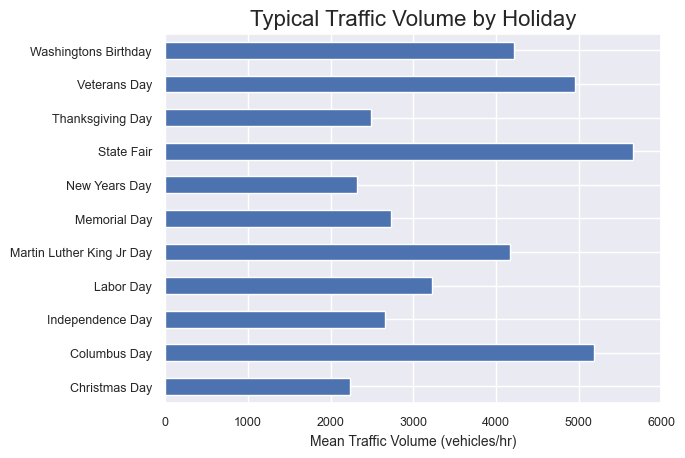

In [67]:
daytime_holidays.groupby('holiday').mean(numeric_only=True)[["traffic_volume"]].plot.barh(fontsize=9, legend=False, ylabel="")

plt.title("Typical Traffic Volume by Holiday", fontsize=16)
plt.xlabel("Mean Traffic Volume (vehicles/hr)", fontsize=10)
plt.xlim(0, 6000)

plt.show()

#### Remarks

As hypothesised, we can see holidays with a considerably large traffic volume, well above the average of the entire dataset. 

>* In particular, the Minnesota State Fair and Columbus Day both have a typical traffic volume exceeding 5,000 vehicles per hour.
>
>* Interestingly, there are other holidays where the typical traffic volume falls below the dataset average. For instance, Christmas and New Years both have means falling below 2,400 vehicles per hour. 

The observation made in the second bullet point was briefly touched upon when first hypothesising what we may find from this indicator. Since Christmas and New Years are holidays that are centred primarily around spending time with others indoors, we can reasonably expect a lot less traffic on the roads during these times.

### Visualizing Change in Traffic Volume by Hour for each Holiday

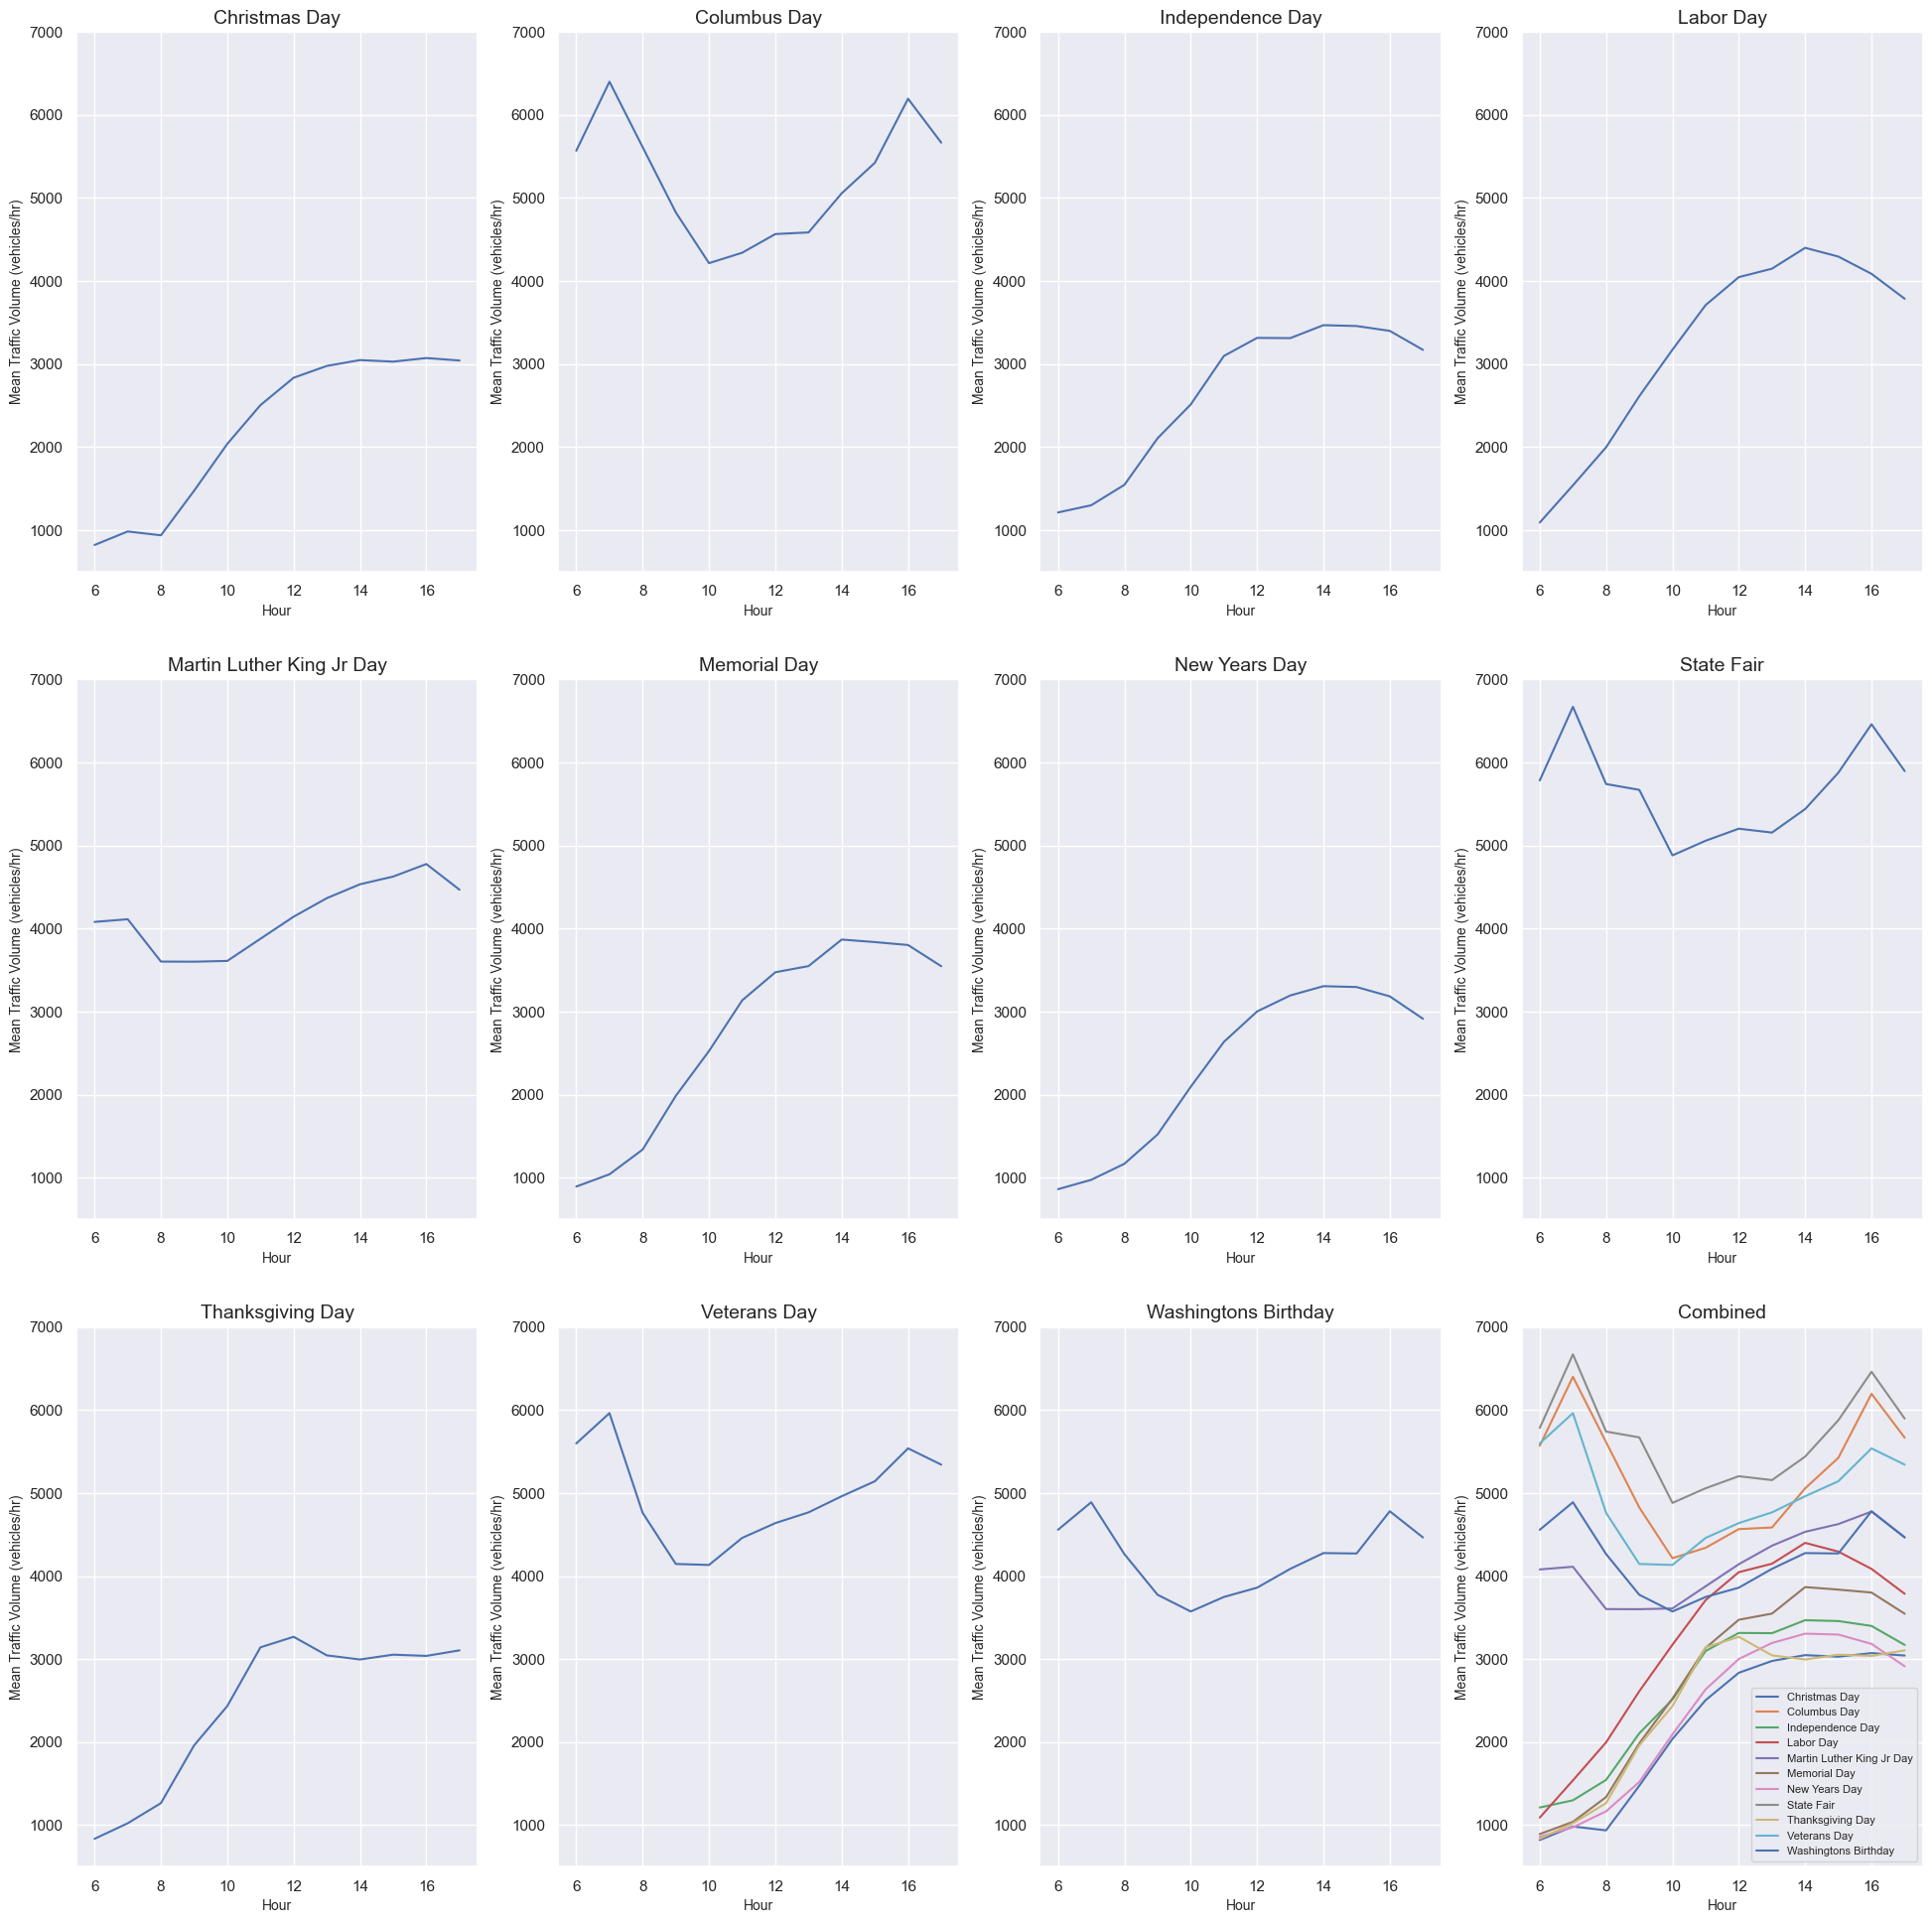

In [68]:
plt.figure(figsize=(24,24))

holidays = {}

for holiday, index in zip(daytime_holidays_averages.index, range(1,12)):
  
  holiday_data = daytime_holidays[daytime_holidays["holiday"] == holiday]
  
  holiday_data = holiday_data.groupby('hour').mean(numeric_only=True)[["traffic_volume"]]
  
  holidays[holiday] = holiday_data
  
  plt.subplot(3,4,index)
  
  plt.title(holiday, fontsize=14)
  
  plt.plot(holidays[holiday])
  
  plt.ylim(500, 7000)
  
  plt.xlabel("Hour", fontsize=10)
  plt.ylabel("Mean Traffic Volume (vehicles/hr)", fontsize=10)

plt.subplot(3,4,12)
  
for holiday, data in holidays.items():
  
  plt.title("Combined", fontsize=14)
  
  plt.plot(data.index, data["traffic_volume"], label=holiday)
  
  plt.ylim(500, 7000)
  
  plt.xlabel("Hour", fontsize=10)
  plt.ylabel("Mean Traffic Volume (vehicles/hr)", fontsize=10)

plt.legend(fontsize=8)
plt.show()

#### Remarks

This is highly interesting. We can see **two distinct categories** of trend in the figure above. 

>* The top five holidays with the greatest traffic volume include the Minnesota State Fair, Colombus Day, Veterans Day, Washingtons Birthday and MLK Jr Day. They can be characterised by high mean traffic volume throughout the day, with peaks in the morning and late afternoon (likely corresponding to when the majority of people are most likely to go-to/leave the event venue). We can rationalise these elevated traffic volumes for these holidays in particular - there are often parades/events and outdoor activities. To attend these celebrations, commuting will most likely be required, hence the surge in traffic volume.

>* The other holidays plotted follow a different trend, with considerably lighter traffic volume throughout the day - especially in the morning. Some of these holidays include Independence Day, Christmas Day, Thanksgiving and New Years - typically days where many people take it easy and spend a lot of time indoors. Additionally, a sizeable portion of the population is likely to be drinking alcohol on many of these occasions, drastically lowering the number of people able to drive on these days.

## Indicator III: Weather

Weather can act as another influence on traffic. There are a number of features in the dataset we can use for our analysis.

In [69]:
daytime.corr(numeric_only=True)[["traffic_volume"]]

,traffic_volume
temp_K,0.124992
temp_oC,0.124992
temp_oF,0.124991
rain_mm,0.003845
snow_mm,-0.004134
cloud_cover_%,0.001151
traffic_volume,1.000000
month,-0.017738
year,0.002505
weekday,-0.462983


The temperature data shows the strongest correlation with traffic volume with a Pearson Correlation Coefficient (*Product Moment Correlation Coefficient*) of `+0.125`. This is not a strong correlation by any means, but is the only numeric feature showing some kind of relationship with traffic volume.

Other relevant numeric weather columns (snow, rain, cloud) do not show a strong correlation whatsoever.

### Visualizing the Temperature-Traffic Volume Relationship

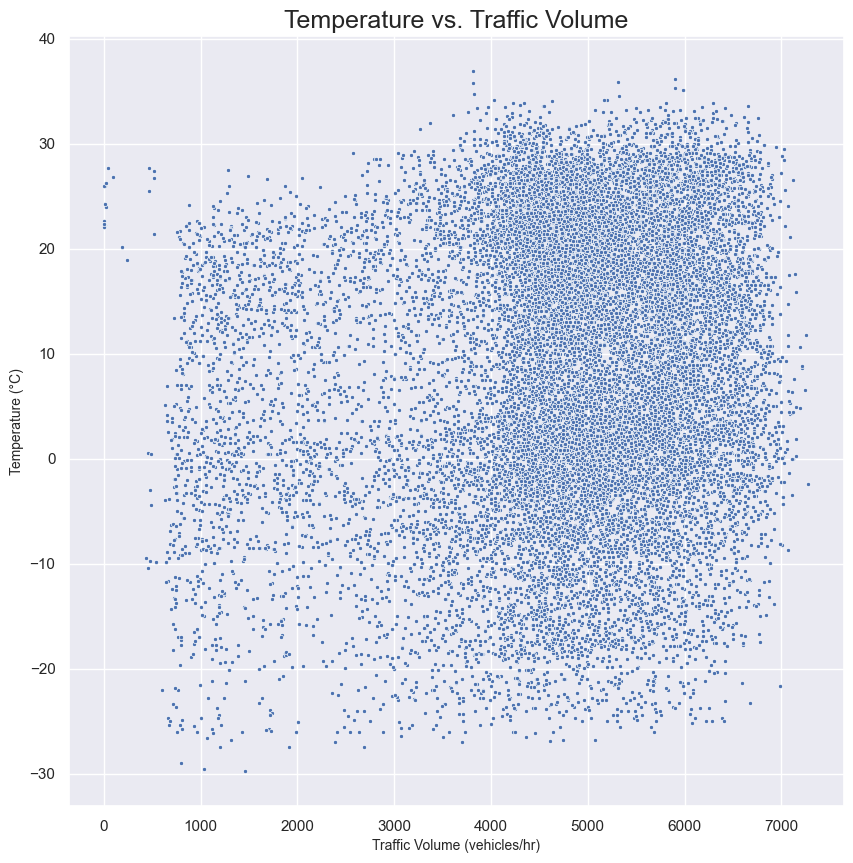

In [70]:
fig, axes = plt.subplots(1,1, figsize=(10,10))

sns.scatterplot(ax=axes, x="traffic_volume", y="temp_oC", data=daytime, marker=".")

plt.title("Temperature vs. Traffic Volume", fontsize=18)
plt.xlabel("Traffic Volume (vehicles/hr)", fontsize=10)
plt.ylabel("Temperature (°C)", fontsize=10)

plt.show()

We can safely conclude temperature is not a reliable indicator of traffic volume.

### Weather Types

There are two additional categorical weather features in the dataset to investigate: `weather_main` and `weather_description`.

In [71]:
daytime_by_main_weather_averages = daytime.groupby("weather_main").mean(numeric_only=True)[["traffic_volume"]]

daytime_by_main_weather_averages

,traffic_volume
weather_main,
Clear,4754.546094
Clouds,4867.459091
Drizzle,4959.224215
Fog,4847.733333
Haze,4621.930085
Mist,4661.229008
Rain,4854.803176
Smoke,3642.857143
Snow,4380.778541


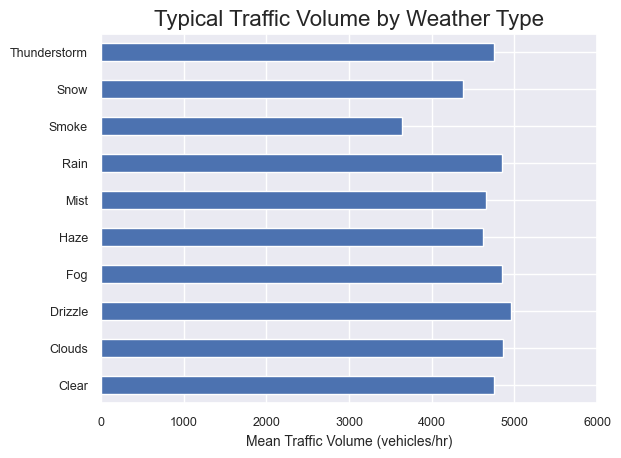

In [72]:
daytime_by_main_weather_averages.plot.barh(fontsize=9, legend=False, ylabel="")

plt.title("Typical Traffic Volume by Weather Type", fontsize=16)
plt.xlabel("Mean Traffic Volume (vehicles/hr)", fontsize=10)
plt.xlim(0, 6000)

plt.show()

None of the main weather types have traffic volumes exceeding 5,000 vehicles per hour. Smokey conditions do seem to lower traffic volume to some extent with a typical traffic volume of 3,642.

We can repeat the process for the `weather_description` field as this is more granular:

In [73]:
daytime_weather_desc_averages = daytime.groupby("weather_description").mean(numeric_only=True)[["traffic_volume"]]

daytime_weather_desc_averages

,traffic_volume
weather_description,
Sky is Clear,4934.817647
broken clouds,4825.152814
drizzle,4793.982456
few clouds,4839.284395
fog,4847.733333
freezing rain,4762.000000
haze,4621.930085
heavy intensity drizzle,5658.333333
heavy intensity rain,4682.772947


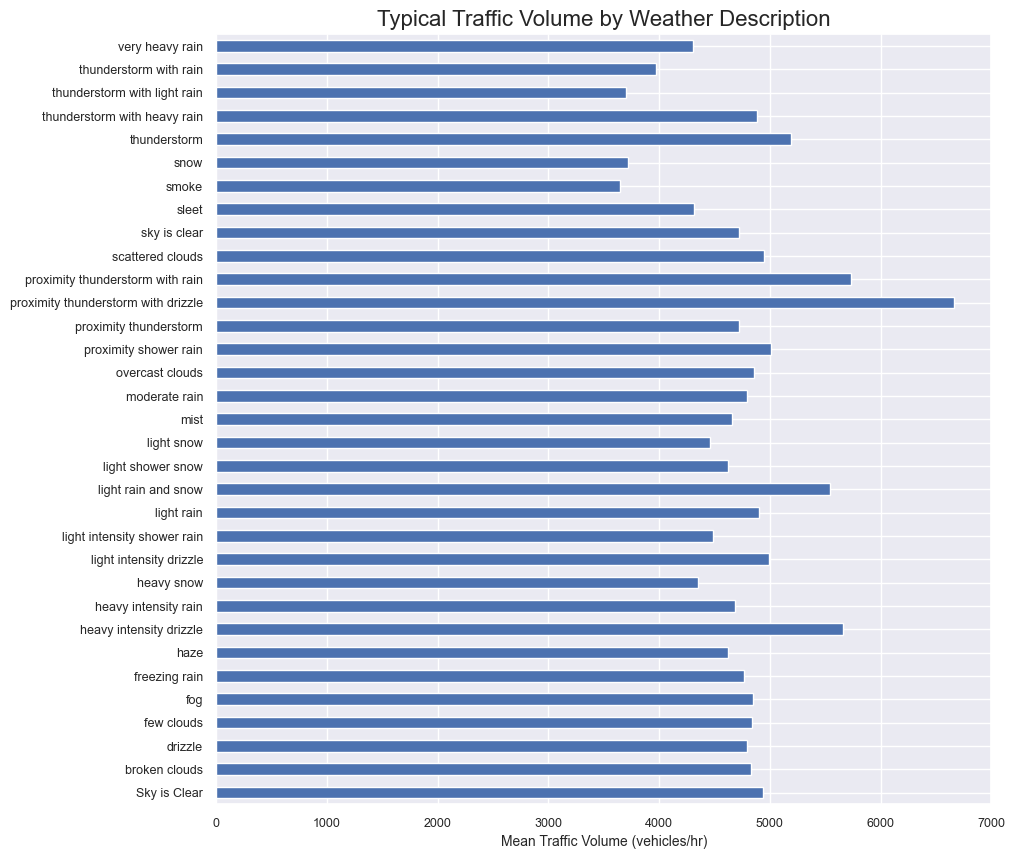

In [74]:
fig, axes = plt.subplots(1,1,figsize=(10,10))

daytime_weather_desc_averages.plot.barh(ax=axes, fontsize=9, legend=False, ylabel="")

plt.title("Typical Traffic Volume by Weather Description", fontsize=16)
plt.xlabel("Mean Traffic Volume (vehicles/hr)", fontsize=10)

plt.show()

There are six weather descriptions with typical traffic volumes exceeding 5,000:

* Proximity thunderstorm with drizzle

* Proximity thunderstorm with rain

* Heavy intensity drizzle

* Light rain and snow

* Thunderstorm

* Proximity shower rain

It is not obvious why these weather types have the greatest traffic volumes. 

> We can speculate that people are more likely to take vehicles when commuting if the weather conditions are poor rather than walking or cycling.

## Conclusions

A dataset of traffic volume and associated features was prepared and EDA was conducted. 

It is important to remember that the following conclusions should not be broadly generalised as the data was collected by an Interstate Station located in one specific area of the world. 

These indicators are likely to be somewhat generalisable in cases where we are looking into another highway based in the USA, but always remain cautious.

**A number of indicators of heavy traffic volume was noted:**

* Time:

    - Traffic is typically heavier during warmer months (Mar-Oct) when compared to colder months (Nov-Feb)

    - Traffic is greater on business days than weekends.
    
    - The peak traffic volume on business days is around 7AM-8AM and 4PM-5PM, corresponding to rush hour.

* Holidays:

    - Not all holidays show the same trend with regards to traffic volume. Holidays with the greatest volume seem to be ones where outdoor events/parades take place, necessitating travel.

* Weather:
    
    - Poor (but not dangerous) weather conditions seem to enhance traffic volume, perhaps because people do not want to be commuting by less sheltered means (walking, cycling).